Problem Statement:

The effect of eight input variables (relative compactness, surface area, wall area, roof
area, overall height, orientation, glazing area, glazing area distribution) on two output
variables, namely heating load (HL) and cooling load (CL), of residential buildings is
investigated using a statistical machine learning framework. We have to use a number
of classical and non-parametric statistical analytic tools to carefully analyze the
strength of each input variable's correlation with each of the output variables in order
to discover the most strongly associated input variables. We need to estimate HL and
CL, we can compare a traditional linear regression approach to a sophisticated
state-of-the-art nonlinear non-parametric method, random forests.

Dataset:
The Dataset you can get through this link: Dataset
The dataset contains eight attributes (or features, denoted by X1...X8) and two
responses
(or outcomes, denoted by y1 and y2).



Data Set Information:

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ
with respect to the glazing area, the glazing area distribution, and the orientation, amongst other
parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain
768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real
valued responses. It can also be used as a multi-class classification problem if the response is rounded
to the nearest integer.

Attribute Information:
The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or
outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two
responses.

Specifically:

X1 Relative Compactness

X2 Surface Area

X3 Wall Area

X4 Roof Area

X5 Overall Height

X6 Orientation

X7 Glazing Area

X8 Glazing Area Distribution

y1 Heating Load - Target

y2 Cooling Load - Target

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/ENB2012_data.csv")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


As the column names are not giving any relavent information , I will change the column names accoring to the given Dataset information in further steps for better understating 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


From the above lines of code and result , We can see that there are 768 records in data set and there are no missing values in the Dataset

Let us rename the columns of the dataset as per the information given in dataset infromation. So that visualization will be easily analized


In [4]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [5]:
df.columns=["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load - Target", "Cooling Load - Target"]

In [6]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load - Target',
       'Cooling Load - Target'],
      dtype='object')

In [7]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load - Target,Cooling Load - Target
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


let us take the value counts and unique values in all columns

In [8]:
for i in list(df.columns):
  print("values counts of ",i,"is")
  print(df[i].value_counts(),end="\n\n")

values counts of  Relative Compactness is
0.98    64
0.90    64
0.86    64
0.82    64
0.79    64
0.76    64
0.74    64
0.71    64
0.69    64
0.66    64
0.64    64
0.62    64
Name: Relative Compactness, dtype: int64

values counts of  Surface Area is
514.5    64
563.5    64
588.0    64
612.5    64
637.0    64
661.5    64
686.0    64
710.5    64
735.0    64
759.5    64
784.0    64
808.5    64
Name: Surface Area, dtype: int64

values counts of  Wall Area is
294.0    192
318.5    192
343.0    128
416.5     64
245.0     64
269.5     64
367.5     64
Name: Wall Area, dtype: int64

values counts of  Roof Area is
220.50    384
147.00    192
122.50    128
110.25     64
Name: Roof Area, dtype: int64

values counts of  Overall Height is
7.0    384
3.5    384
Name: Overall Height, dtype: int64

values counts of  Orientation is
2    192
3    192
4    192
5    192
Name: Orientation, dtype: int64

values counts of  Glazing Area is
0.10    240
0.25    240
0.40    240
0.00     48
Name: Glazing Area, dty

In [9]:
for i in list(df.columns):
  print("Unique values of ",i,"is")
  print(df[i].nunique(),end="\n\n")

Unique values of  Relative Compactness is
12

Unique values of  Surface Area is
12

Unique values of  Wall Area is
7

Unique values of  Roof Area is
4

Unique values of  Overall Height is
2

Unique values of  Orientation is
4

Unique values of  Glazing Area is
4

Unique values of  Glazing Area Distribution is
6

Unique values of  Heating Load - Target is
586

Unique values of  Cooling Load - Target is
636



From the above results , We can observe that though the features are looking like continuous variables , they can be treated as categorical values

In [10]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load - Target',
       'Cooling Load - Target'],
      dtype='object')

## Exploratory Data analysis


Let us check count plots for all the features

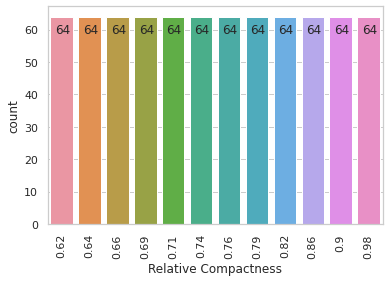

In [11]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Relative Compactness", data=df)
ax.set_xticklabels(labels=sorted(list(df['Relative Compactness'].unique())),rotation=90)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()-5))
plt.show()

We can see equal distribution of records for all unique values of Relative Compactness

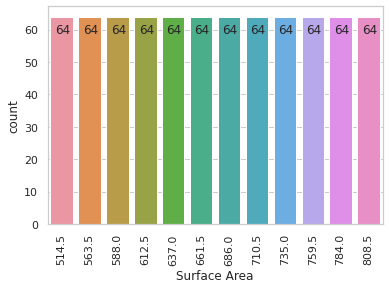

In [12]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Surface Area", data=df)
ax.set_xticklabels(labels=sorted(list(df['Surface Area'].unique())),rotation=90)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()-5))
plt.show()

We can see equal distribution of records for all unique values of Surface Area

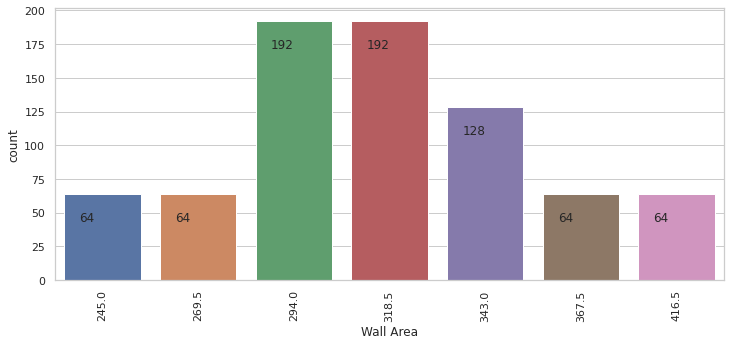

In [75]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Wall Area", data=df)
ax.set_xticklabels(labels=sorted(list(df['Wall Area'].unique())),rotation=90)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()-20))
plt.savefig('Wall Area.png')  
plt.show()

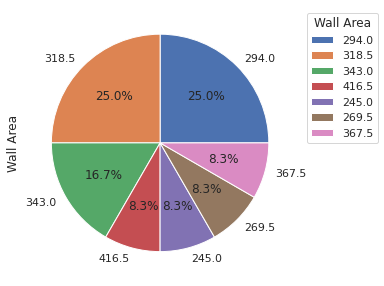

In [76]:
plt.figure(figsize=(5,5))
df["Wall Area"].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.legend(list(df["Wall Area"].unique()),bbox_to_anchor=(1.02, 1),title="Wall Area")
plt.savefig('wall_area_1.png')
plt.show()

From above figures we can see around 66 percent of data is of wall Area in [294, 318.5, 343]

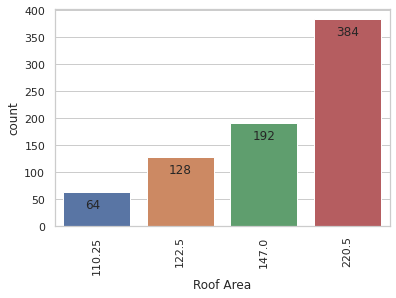

In [15]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Roof Area", data=df)
ax.set_xticklabels(labels=sorted(list(df['Roof Area'].unique())),rotation=90)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.26, p.get_height()-30))
plt.show()

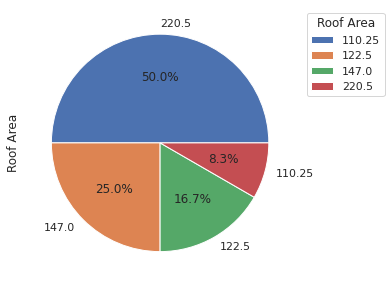

In [16]:
plt.figure(figsize=(5,5))
df["Roof Area"].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.legend(list(df["Roof Area"].unique()),bbox_to_anchor=(1.02, 1),title="Roof Area")
plt.show()

We can notice around 75 percent of data has 220.5 or 147 as roof Area 

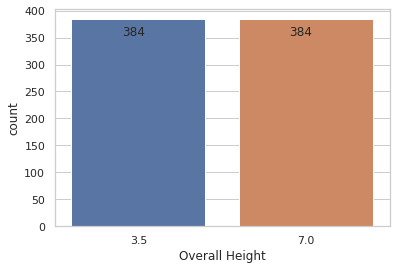

In [17]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Overall Height", data=df)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()-30))
plt.show()

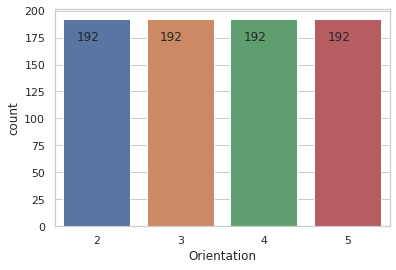

In [18]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Orientation", data=df)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()-20))
plt.show()

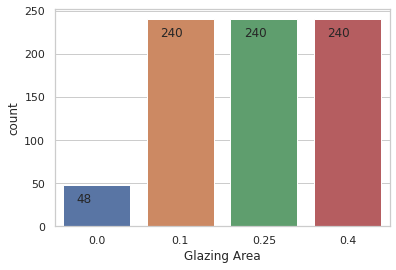

In [19]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Glazing Area", data=df)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()-20))
plt.show()

Glazing area is 0 for a very small percent of data

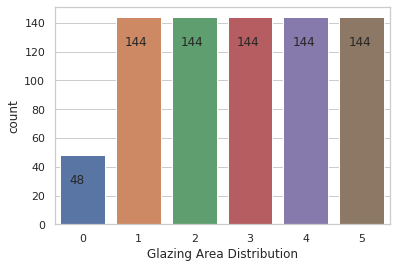

In [20]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Glazing Area Distribution", data=df)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()-20))
plt.show()

Glazing area Distribution is 0 for a very small percent of data

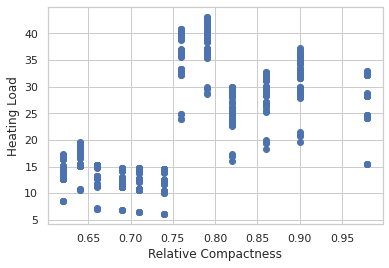

In [21]:
plt.scatter(df['Relative Compactness'],df['Heating Load - Target'])
plt.xlabel("Relative Compactness")
plt.ylabel("Heating Load")
plt.show()

We can notice the changes in Heating load with respect to the change in Relative Compactness . We can notice  Heating load is low till Relative Compactness reaches 0.75 . As Relative compactness increases further , Heating load is increases Tremendously

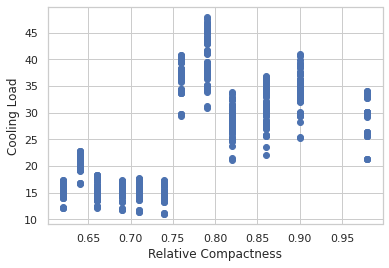

In [22]:
plt.scatter(df['Relative Compactness'],df['Cooling Load - Target'])
plt.xlabel("Relative Compactness")
plt.ylabel("Cooling Load")
plt.show()

We can notice the changes in Cooling load with respect to the change in Relative Compactness . We can notice  Cooling load is low till Relative Compactness reaches 0.75 . As Relative compactness increases further , Cooling load is increases Tremendously

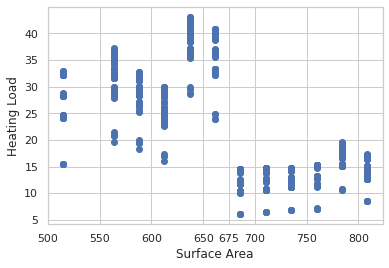

In [23]:
plt.scatter(df['Surface Area'],df['Heating Load - Target'])
plt.xlabel("Surface Area")
plt.xticks([500,550,600,650,675,700,750,800])
plt.ylabel("Heating Load")
plt.show()

We can notice Heating load is high till Surface area crosses 675 , After that Heating load is low

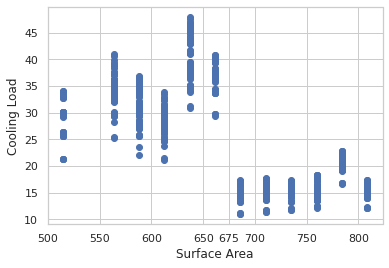

In [24]:
plt.scatter(df['Surface Area'],df['Cooling Load - Target'])
plt.xticks([500,550,600,650,675,700,750,800])
plt.xlabel("Surface Area")
plt.ylabel("Cooling Load")
plt.show()

We can notice Cooling load is high till Surface area crosses 675 , After that Cooling load is low

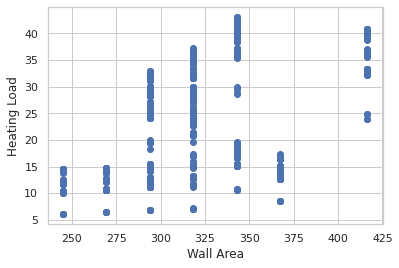

In [25]:
plt.scatter(df['Wall Area'],df['Heating Load - Target'])
plt.xlabel("Wall Area")
plt.ylabel("Heating Load")
plt.show()

We can notice increasing trend in Heating load till Wall Area becomes 350 ,after that there is a drop in heating load in between 350-375 . Heating load increased after  400.

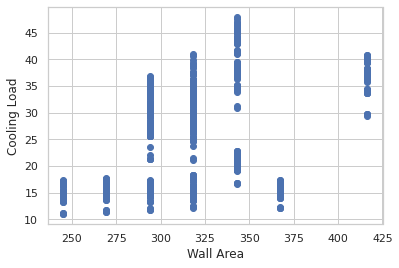

In [26]:
plt.scatter(df['Wall Area'],df['Cooling Load - Target'])
plt.xlabel("Wall Area")
plt.ylabel("Cooling Load")
plt.show()

We can notice increasing trend in Cooling load till Wall Area becomes 350 ,after that there is a drop in Cooling load in between 350-375 . Cooling load increased after  400.

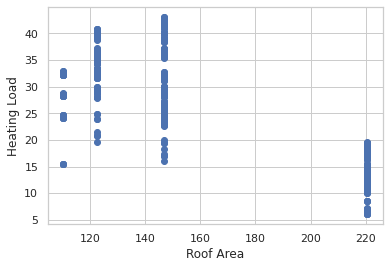

In [27]:
plt.scatter(df['Roof Area'],df['Heating Load - Target'])
plt.xlabel("Roof Area")
plt.ylabel("Heating Load")
plt.show()

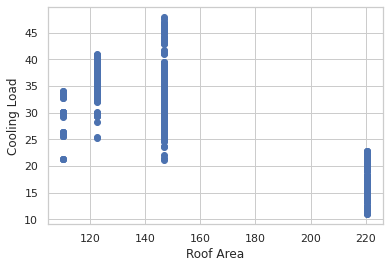

In [28]:
plt.scatter(df['Roof Area'],df['Cooling Load - Target'])
plt.xlabel("Roof Area")
plt.ylabel("Cooling Load")
plt.show()

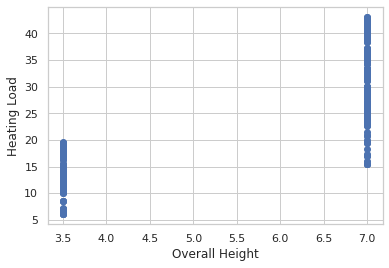

In [29]:
plt.scatter(df['Overall Height'],df['Heating Load - Target'])
plt.xlabel("Overall Height")
plt.ylabel("Heating Load")
plt.show()

We can notice an increase in Heating load with increase in Overall Height

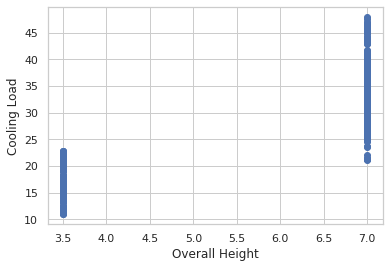

In [30]:
plt.scatter(df['Overall Height'],df['Cooling Load - Target'])
plt.xlabel("Overall Height")
plt.ylabel("Cooling Load")
plt.show()

We can notice an increase in Cooling load with increase in Overall Height

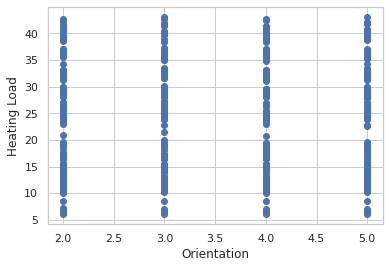

In [31]:
plt.scatter(df['Orientation'],df['Heating Load - Target'])
plt.xlabel("Orientation")
plt.ylabel("Heating Load")
plt.show()

There is not much impact on Heating load due to Orientaion

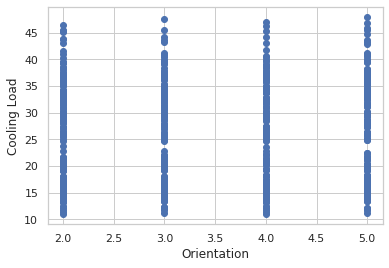

In [32]:
plt.scatter(df['Orientation'],df['Cooling Load - Target'])
plt.xlabel("Orientation")
plt.ylabel("Cooling Load")
plt.show()

There is not much impact on Cooling load due to Orientaion

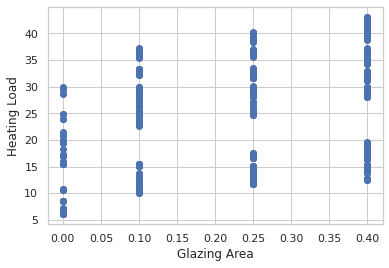

In [33]:
plt.scatter(df['Glazing Area'],df['Heating Load - Target'])
plt.xlabel("Glazing Area")
plt.ylabel("Heating Load")
plt.show()

We can notice an increasing trend in Heating load with increase in Glazing Area

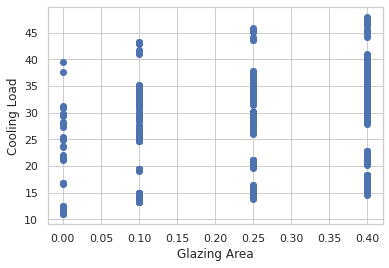

In [34]:
plt.scatter(df['Glazing Area'],df['Cooling Load - Target'])
plt.xlabel("Glazing Area")
plt.ylabel("Cooling Load")
plt.show()

We can notice an increasing trend in Cooling load with increase in Glazing Area

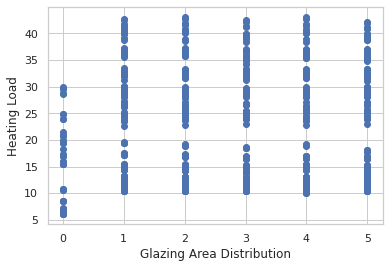

In [35]:
plt.scatter(df['Glazing Area Distribution'],df['Heating Load - Target'])
plt.xlabel("Glazing Area Distribution")
plt.ylabel("Heating Load")
plt.show()

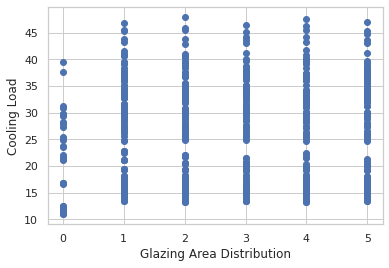

In [36]:
plt.scatter(df['Glazing Area Distribution'],df['Cooling Load - Target'])
plt.xlabel("Glazing Area Distribution")
plt.ylabel("Cooling Load")
plt.show()

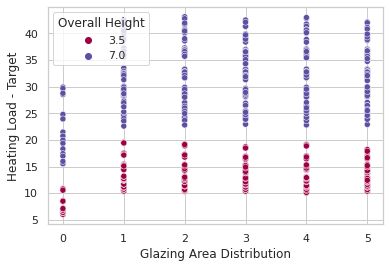

In [37]:
sns.scatterplot(
    data=df, x="Glazing Area Distribution", y="Heating Load - Target", hue="Overall Height", legend="full", palette='Spectral')
plt.show()

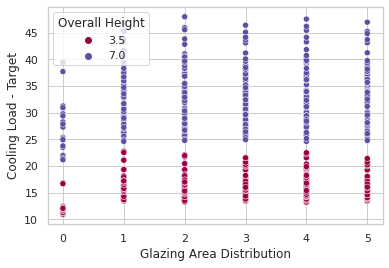

In [38]:
sns.scatterplot(
    data=df, x="Glazing Area Distribution", y="Cooling Load - Target", hue="Overall Height", legend="full", palette='Spectral')
plt.show()

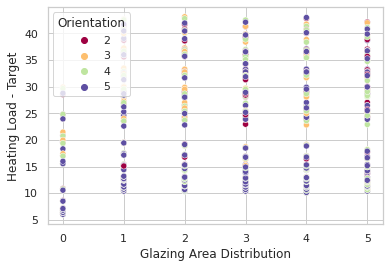

In [39]:
sns.scatterplot(
    data=df, x="Glazing Area Distribution", y="Heating Load - Target", hue="Orientation", legend="full", palette='Spectral')
plt.show()

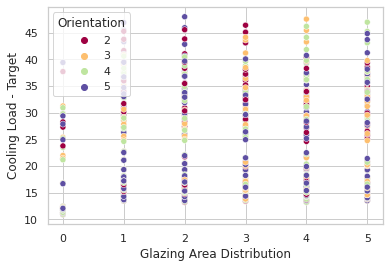

In [40]:
sns.scatterplot(
    data=df, x="Glazing Area Distribution", y="Cooling Load - Target", hue="Orientation", legend="full", palette='Spectral')
plt.show()

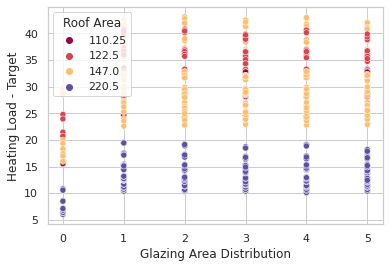

In [41]:
sns.scatterplot(
    data=df, x="Glazing Area Distribution", y="Heating Load - Target", hue="Roof Area", legend="full", palette='Spectral')
plt.show()

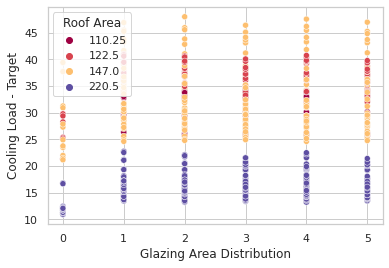

In [42]:
sns.scatterplot(
    data=df, x="Glazing Area Distribution", y="Cooling Load - Target", hue="Roof Area", legend="full", palette='Spectral')
plt.show()

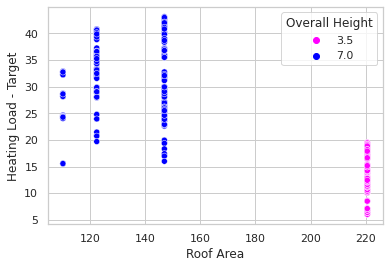

In [43]:
sns.scatterplot(
    data=df, x="Roof Area", y="Heating Load - Target", hue="Overall Height", legend="full", palette=["magenta","blue"])
plt.show()

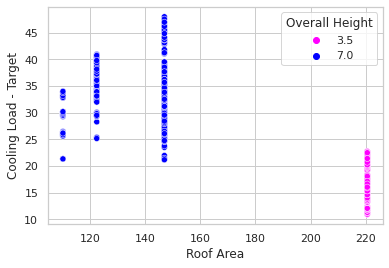

In [44]:
sns.scatterplot(
    data=df, x="Roof Area", y="Cooling Load - Target", hue="Overall Height", legend="full", palette=["magenta","blue"])
plt.show()

In [45]:
X = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution']].copy()
y = df[['Heating Load - Target',
       'Cooling Load - Target']].copy()

In [46]:
X

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [47]:
y

,Heating Load - Target,Cooling Load - Target
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


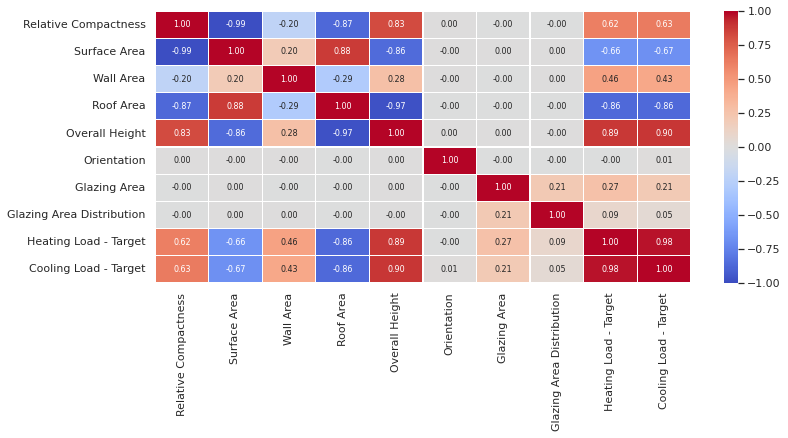

In [77]:
plt.rcParams["figure.figsize"] = [12, 5]
ax = sns.heatmap(df.corr(),cmap = 'coolwarm', annot=True,annot_kws = {'size': 8},vmax=1,vmin=-1,fmt='0.2f', linewidths=0.25)
plt.savefig("heatmap")
plt.show()

From Heatmap ,We can notice there is not much linear relationship for Orientation , Glazing Area and Glazing Area Distribution with Heating and Cooling Loads.  

## Train-test split


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [51]:
print("X_train",X_train.shape,"y_train",y_train.shape,"X_test",X_test.shape,"y_test",y_test.shape,sep="\n")

X_train
(576, 8)
y_train
(576, 2)
X_test
(192, 8)
y_test
(192, 2)


#Modelling

As given in Problem statement , We will be comparing Linear regression and Random forest methods.

## using Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
Lin_reg = LinearRegression()

In [53]:
Lin_reg.fit(X_train,y_train)

LinearRegression()

In [54]:
Lin_reg.score(X_train,y_train)

0.9020199120328549

In [55]:
Lin_reg.score(X_test,y_test)

0.9012353186912481

In [56]:
y_pred=Lin_reg.predict(X_test)
y_pred

array([[17.40215003, 19.18496132],
       [ 8.0344657 , 12.33252258],
       [29.43868985, 32.37983995],
       [25.77819412, 29.91661256],
       [31.10951461, 32.23309094],
       [27.40443149, 30.34784922],
       [28.28325941, 30.15965074],
       [34.07792866, 35.56651868],
       [29.28009821, 32.05026011],
       [28.56886852, 31.19058166],
       [ 6.94428247, 12.02554519],
       [35.04978289, 36.8798153 ],
       [11.82136476, 14.92355261],
       [35.29526603, 36.77479699],
       [35.8165401 , 36.80332703],
       [26.59729326, 29.74776329],
       [ 9.41774859, 13.51906091],
       [27.23067347, 30.33833921],
       [15.9729197 , 18.10104944],
       [12.31572891, 15.47797279],
       [13.20823694, 15.9249828 ],
       [31.28327263, 32.24260095],
       [ 9.63292397, 13.17547597],
       [32.43870307, 34.46279016],
       [ 5.66303247, 10.96304519],
       [15.24401701, 17.67545131],
       [13.04463161, 15.90357092],
       [14.5557662 , 16.52695303],
       [ 9.07023255,

In [79]:
(Lin_reg.coef_)

array([[-5.53981092e+01,  1.96331442e+11, -1.96331442e+11,
        -3.92662883e+11,  4.03265667e+00, -7.17251264e-02,
         1.95219206e+01,  1.73758021e-01],
       [-6.33130815e+01, -3.67776248e+11,  3.67776248e+11,
         7.35552497e+11,  4.27446079e+00,  1.14528313e-01,
         1.46498568e+01,  9.51001048e-03]])

In [58]:
Lin_reg.intercept_

array([71.27289931, 85.70536458])

Evaluation

In [59]:
from sklearn.metrics import r2_score
print(f'R2 Score: {round(r2_score(y_test, y_pred), 3)}')                         

R2 Score: 0.901


Linear Regression model gave R2 score of 0.90

## Using Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1, random_state=0)

In [61]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [62]:
rf.feature_importances_

array([0.30625579, 0.20602548, 0.04846086, 0.12249615, 0.23276684,
       0.00607758, 0.0641007 , 0.01381661])

In [63]:
rf.score(X_train,y_train)

0.9972356582590047

In [64]:
rf.score(X_test,y_test)

0.9771656024836057

In [65]:
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([[15.2255, 17.65  ],
       [10.4103, 13.5926],
       [36.2644, 38.574 ],
       [17.9138, 22.4728],
       [32.4144, 32.4671],
       [29.0659, 29.6144],
       [28.3125, 29.8962],
       [29.2151, 30.2335],
       [28.667 , 33.8661],
       [23.7937, 26.5236],
       [ 6.3929, 11.431 ],
       [42.355 , 41.1203],
       [11.3707, 14.6567],
       [42.1499, 41.6974],
       [41.4832, 45.507 ],
       [26.4796, 27.5656],
       [10.6854, 14.2207],
       [29.1758, 29.6603],
       [14.3545, 14.8792],
       [12.4445, 15.126 ],
       [12.7756, 15.7054],
       [32.6831, 32.381 ],
       [10.6618, 13.7358],
       [39.1793, 42.3139],
       [ 6.0518, 11.0212],
       [14.557 , 17.1706],
       [12.8491, 14.1013],
       [13.7193, 16.3034],
       [10.719 , 14.2087],
       [39.9187, 38.3995],
       [12.7412, 14.2292],
       [12.9044, 16.0326],
       [41.811 , 42.693 ],
       [12.959 , 15.9945],
       [28.5765, 29.6379],
       [36.8239, 36.7626],
       [14.2123, 15.9019],
 

In [66]:
print(f'R2 Score: {round(r2_score(y_test, y_pred_rf), 3)}')    

R2 Score: 0.977


A basic Random forest model  gave R2 score of 0.977

Hyper parameter tuning using grid search

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
space = {  
              'max_depth': [10, 15, 20],
              'max_features': [4, 5, 6],
              'n_estimators': [200, 250, 300],
        }

rf_tuned = RandomForestRegressor(random_state=1)

search = GridSearchCV(estimator = rf_tuned,
                        param_grid = space,
                        cv=5,
                        n_jobs=-1,
                        verbose=2,
                        return_train_score=True,
                        scoring='r2')

search.fit(X_train, y_train)
print(search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'max_depth': 15, 'max_features': 4, 'n_estimators': 300}


In [69]:
rf_final=RandomForestRegressor(max_depth=15, max_features=4, n_estimators=300, random_state=1)

In [70]:
rf_final.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features=4, n_estimators=300,
                      random_state=1)

In [71]:
y_pred_rf_final=rf_final.predict(X_test)

In [72]:
y_pred_rf_final

array([[15.1461    , 17.65103333],
       [10.40916667, 13.60213333],
       [36.38303333, 38.40626667],
       [17.7167    , 22.78246667],
       [32.2166    , 32.91463333],
       [29.06976667, 29.74313333],
       [28.41666667, 29.73686667],
       [29.0265    , 29.9754    ],
       [28.85203333, 33.05343333],
       [23.86273333, 26.73303333],
       [ 6.4645    , 11.46996667],
       [42.28083333, 40.4713    ],
       [11.45746667, 14.56773333],
       [41.95873333, 41.52433333],
       [41.1508    , 44.8262    ],
       [26.50196667, 27.7362    ],
       [10.6882    , 14.19413333],
       [29.18316667, 29.81813333],
       [14.45983333, 14.93533333],
       [12.43276667, 15.13723333],
       [12.73063333, 15.66143333],
       [32.45156667, 32.90396667],
       [10.67463333, 13.7463    ],
       [39.23093333, 42.07903333],
       [ 6.2196    , 11.16326667],
       [14.54906667, 17.1524    ],
       [12.9268    , 14.1478    ],
       [13.9086    , 16.3723    ],
       [10.7474    ,

In [73]:
print(f'R2 Score: {round(r2_score(y_test, y_pred_rf_final), 3)}')    

R2 Score: 0.981


A random forest model after Hyper paramter tuning manged to get an R2 score of 0.981

In [74]:
rf_final.feature_importances_

array([0.24840973, 0.22366317, 0.03799005, 0.15852982, 0.24726466,
       0.00654788, 0.05506186, 0.02253284])

We can see Random Forest algorithm is doing a better job for predicting the Heating and Cooling loads when compared to Linear Regression.